Found 23021 images belonging to 4 classes.
Found 5277 images belonging to 4 classes.
Found 1476 images belonging to 4 classes.


C:\Users\21629\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\21629\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 838s 1s/step - accuracy: 0.5640 - loss: 1.5379 - val_accuracy: 0.5289 - val_loss: 1.4971
Epoch 2/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 833s 1s/step - accuracy: 0.8409 - loss: 0.4217 - val_accuracy: 0.5876 - val_loss: 2.0036
Epoch 3/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 812s 1s/step - accuracy: 0.9308 - loss: 0.1956 - val_accuracy: 0.5753 - val_loss: 1.6673
Epoch 4/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 820s 1s/step - accuracy: 0.9660 - loss: 0.1029 - val_accuracy: 0.5977 - val_loss: 1.6336
Epoch 5/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 880s 1s/step - accuracy: 0.9823 - loss: 0.0612 - val_accuracy: 0.5350 - val_loss: 2.5785
Epoch 6/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 830s 1s/step - accuracy: 0.9830 - loss: 0.0558 - val_accuracy: 0.5577 - val_loss: 2.4026
Epoch 7/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 870s 1s/step - accuracy: 0.9840 - loss: 0.0516 - val_accuracy: 0.6005 - val_loss: 1.6490
Epoch 8/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 842s 1s/step - accuracy: 0.9832 - loss: 0.0539 - val_accu

✅ Modèle sauvegardé dans : C:\Users\21629\Desktop\Image classification\ecg_model.h5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 320ms/step - accuracy: 0.7588 - loss: 1.6298
🎯 Test Accuracy: 59.01%
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step
📝 Rapport de classification :
              precision    recall  f1-score   support

         AHB       0.45      0.93      0.61       477
         HMI       0.83      0.35      0.49       193
          MI       0.96      0.43      0.59       100
      Normal       0.87      0.45      0.59       706

    accuracy                           0.59      1476
   macro avg       0.78      0.54      0.57      1476
weighted avg       0.74      0.59      0.58      1476



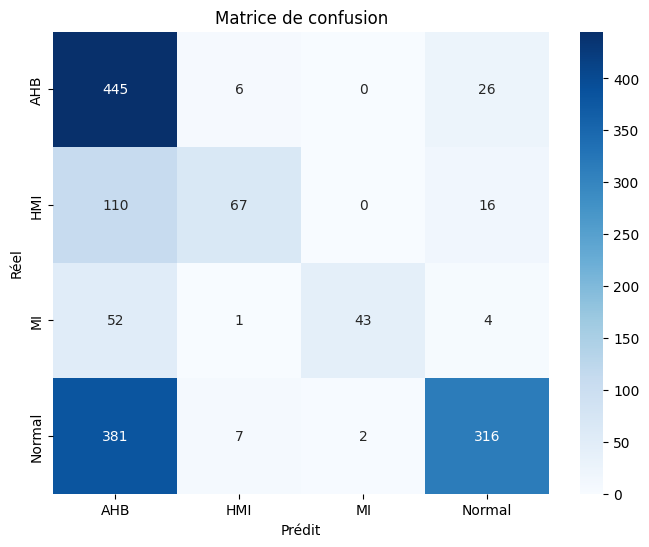

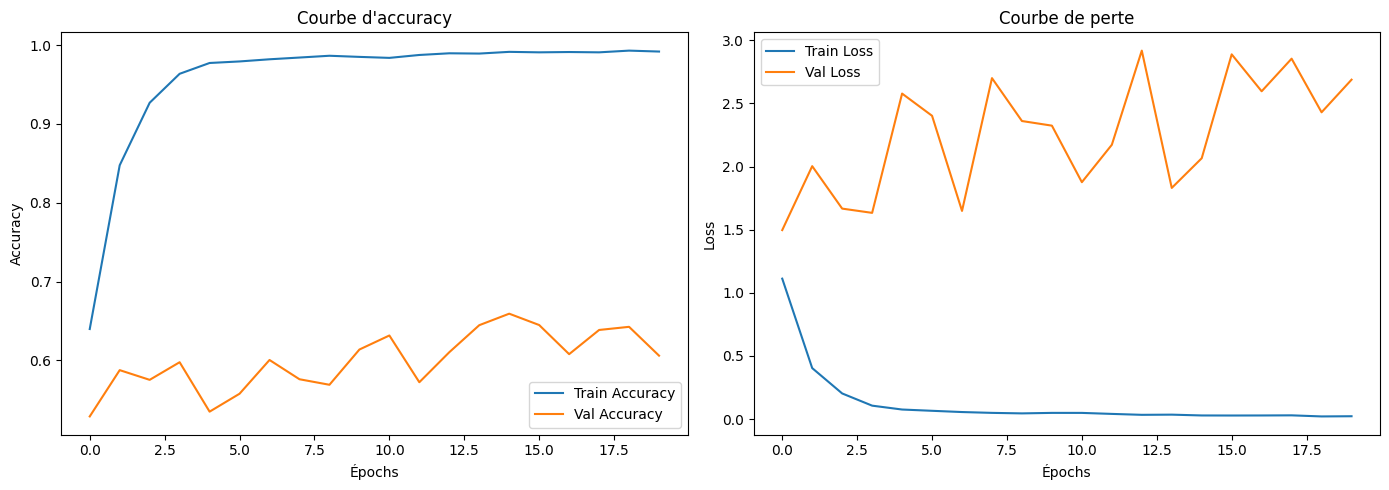

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Paths
train_path = r"C:\Users\21629\Desktop\Image dataset clean\train"
valid_path = r"C:\Users\21629\Desktop\Image dataset clean\valid"
test_path = r"C:\Users\21629\Desktop\Image dataset clean\test"
save_model_path = r"C:\Users\21629\Desktop\Image classification\ecg_model.h5"

# Image size
img_size = (224, 224)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=20, validation_data=valid_generator)

# Save the model
model.save(save_model_path)
print(f"✅ Modèle sauvegardé dans : {save_model_path}")

# Évaluation
loss, acc = model.evaluate(test_generator)
print(f"🎯 Test Accuracy: {acc*100:.2f}%")

# Prédictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Rapport de classification
print("📝 Rapport de classification :")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# Courbes d'entraînement
plt.figure(figsize=(14,5))
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Courbe d'accuracy")
plt.xlabel("Épochs")
plt.ylabel("Accuracy")
plt.legend()
# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Courbe de perte")
plt.xlabel("Épochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step - accuracy: 0.7588 - loss: 1.6298
📊 Résultats sur le test set :
  - 📈 Test Accuracy: 59.01%
  - 📉 Test Loss: 2.7241
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 305ms/step
✅ Échantillons correctement classés : 871/1476 (59.01%)
📝 Rapport de classification :
              precision    recall  f1-score   support

         AHB       0.45      0.93      0.61       477
         HMI       0.83      0.35      0.49       193
          MI       0.96      0.43      0.59       100
      Normal       0.87      0.45      0.59       706

    accuracy                           0.59      1476
   macro avg       0.78      0.54      0.57      1476
weighted avg       0.74      0.59      0.58      1476



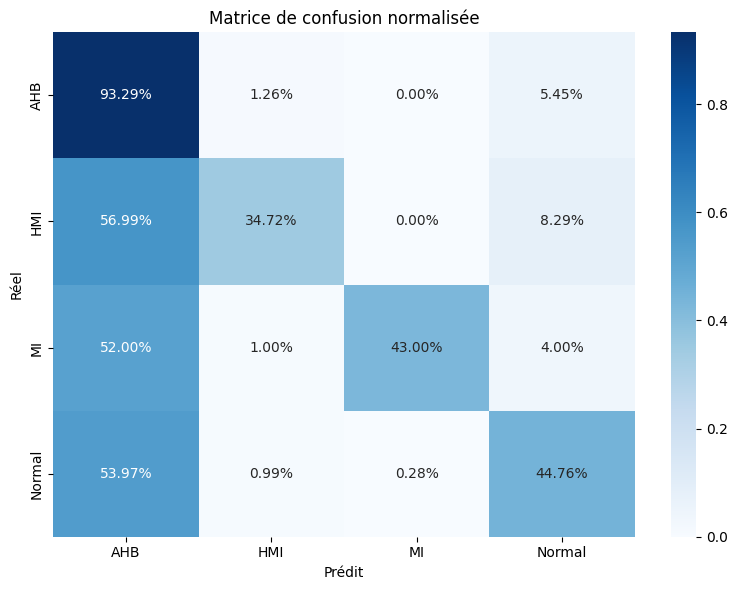

In [2]:
# Résultats finaux
loss, acc = model.evaluate(test_generator)
print(f"📊 Résultats sur le test set :")
print(f"  - 📈 Test Accuracy: {acc*100:.2f}%")
print(f"  - 📉 Test Loss: {loss:.4f}")

# Prédictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Nombre de prédictions correctes
correct_preds = np.sum(y_pred_classes == y_true)
total_samples = len(y_true)
print(f"✅ Échantillons correctement classés : {correct_preds}/{total_samples} ({(correct_preds/total_samples)*100:.2f}%)")

# Rapport de classification
print("📝 Rapport de classification :")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Matrice de confusion normalisée
cm = confusion_matrix(y_true, y_pred_classes)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Matrice de confusion normalisée")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

In [4]:
# Évaluation sur le train set
train_loss, train_acc = model.evaluate(train_generator)
print(f"🧠 Test Accuracy: {train_acc*100:.2f}%")
print(f"🧪 Test Loss: {train_loss:.4f}")


720/720 ━━━━━━━━━━━━━━━━━━━━ 270s 375ms/step - accuracy: 0.8647 - loss: 0.6876
🧠 Test Accuracy: 86.23%
🧪 Test Loss: 0.7046


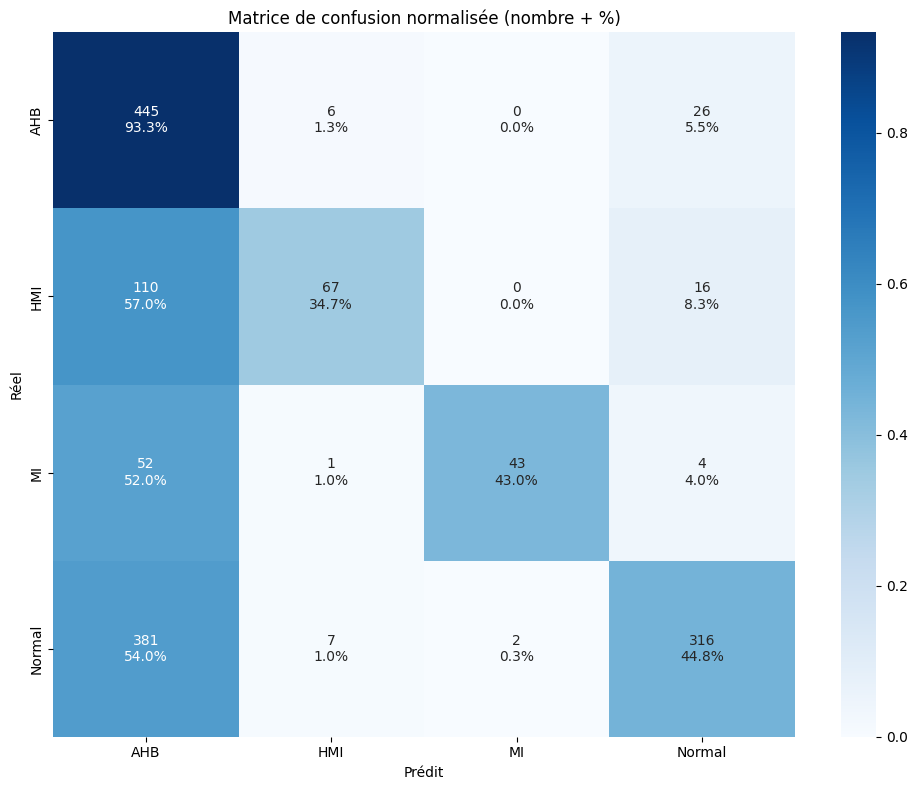

✅ AHB : 445 échantillons bien classés
✅ HMI : 67 échantillons bien classés
✅ MI : 43 échantillons bien classés
✅ Normal : 316 échantillons bien classés


In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalisation par ligne

# Combinaison des deux (valeurs + pourcentage)
labels = np.asarray([
    [f"{count}\n{percent:.1%}" for count, percent in zip(row_counts, row_percents)]
    for row_counts, row_percents in zip(cm, cm_normalized)
])

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=labels, fmt='', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, cbar=True)

plt.title("Matrice de confusion normalisée (nombre + %)")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# Comptage des échantillons bien classés (diagonale)
correct_per_class = np.diag(cm)
for i, label in enumerate(class_labels):
    print(f"✅ {label} : {correct_per_class[i]} échantillons bien classés")
